In [1]:
# -*- coding: utf-8 -*-
#Linear Regression in Python with Scikit-Learn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
#%matplotlib inline

In [2]:
#--------------IMPORT DATA HERE-----------------------
dataset = pd.read_csv(r'C:\PYTHON LEARNING\STATISTIC\DATA RESEARCH\chỉ số signup.csv')

#tính kích cỡ dữ liệu
print('>>>>>> KÍCH CỠ DỮ LIỆU:',dataset.shape)
print('>>>>>> CÁC BIẾN TRONG DATA:')
print(dataset.dtypes) #xác định các biến có trong data (tìm tiêu đề))

>>>>>> KÍCH CỠ DỮ LIỆU: (69, 10)
>>>>>> CÁC BIẾN TRONG DATA:
Ngày                           object
Chỉ số Signup                 float64
Khách hàng tiềm năng            int64
Số lượt click vào liên kết      int64
Số người tiếp cận được          int64
Số lần hiển thị                 int64
Tần suất                      float64
Số tiền đã chi tiêu (VND)       int64
Bắt đầu báo cáo                object
Kết thúc báo cáo               object
dtype: object


In [3]:
#--------xác định 8 chỉ số cơ bản của biến cụ thể-----
print('>>>>>> 8 CHỈ SỐ THỐNG KÊ CƠ BẢN')
print(dataset['Chỉ số Signup'].describe())

# tổng kết các câu lệnh statistic trong pandas
# 1	count()	Number of non-null observations
# 2	sum()	Sum of values
# 3	mean()	Mean of Values
# 4	median()	Median of Values
# 5	mode()	Mode of values
# 6	std()	Standard Deviation of the Values
# 7	min()	Minimum Value
# 8	max()	Maximum Value
# 9	abs()	Absolute Value
# 10	prod()	Product of Values
# 11	cumsum()	Cumulative Sum
# 12	cumprod()	Cumulative Product

#kiểm tra & loại bỏ dữ liệu Null
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')

>>>>>> 8 CHỈ SỐ THỐNG KÊ CƠ BẢN
count     69.000000
mean     112.619064
std       59.979842
min       43.125000
25%       67.826923
50%      103.239437
75%      134.857143
max      361.000000
Name: Chỉ số Signup, dtype: float64


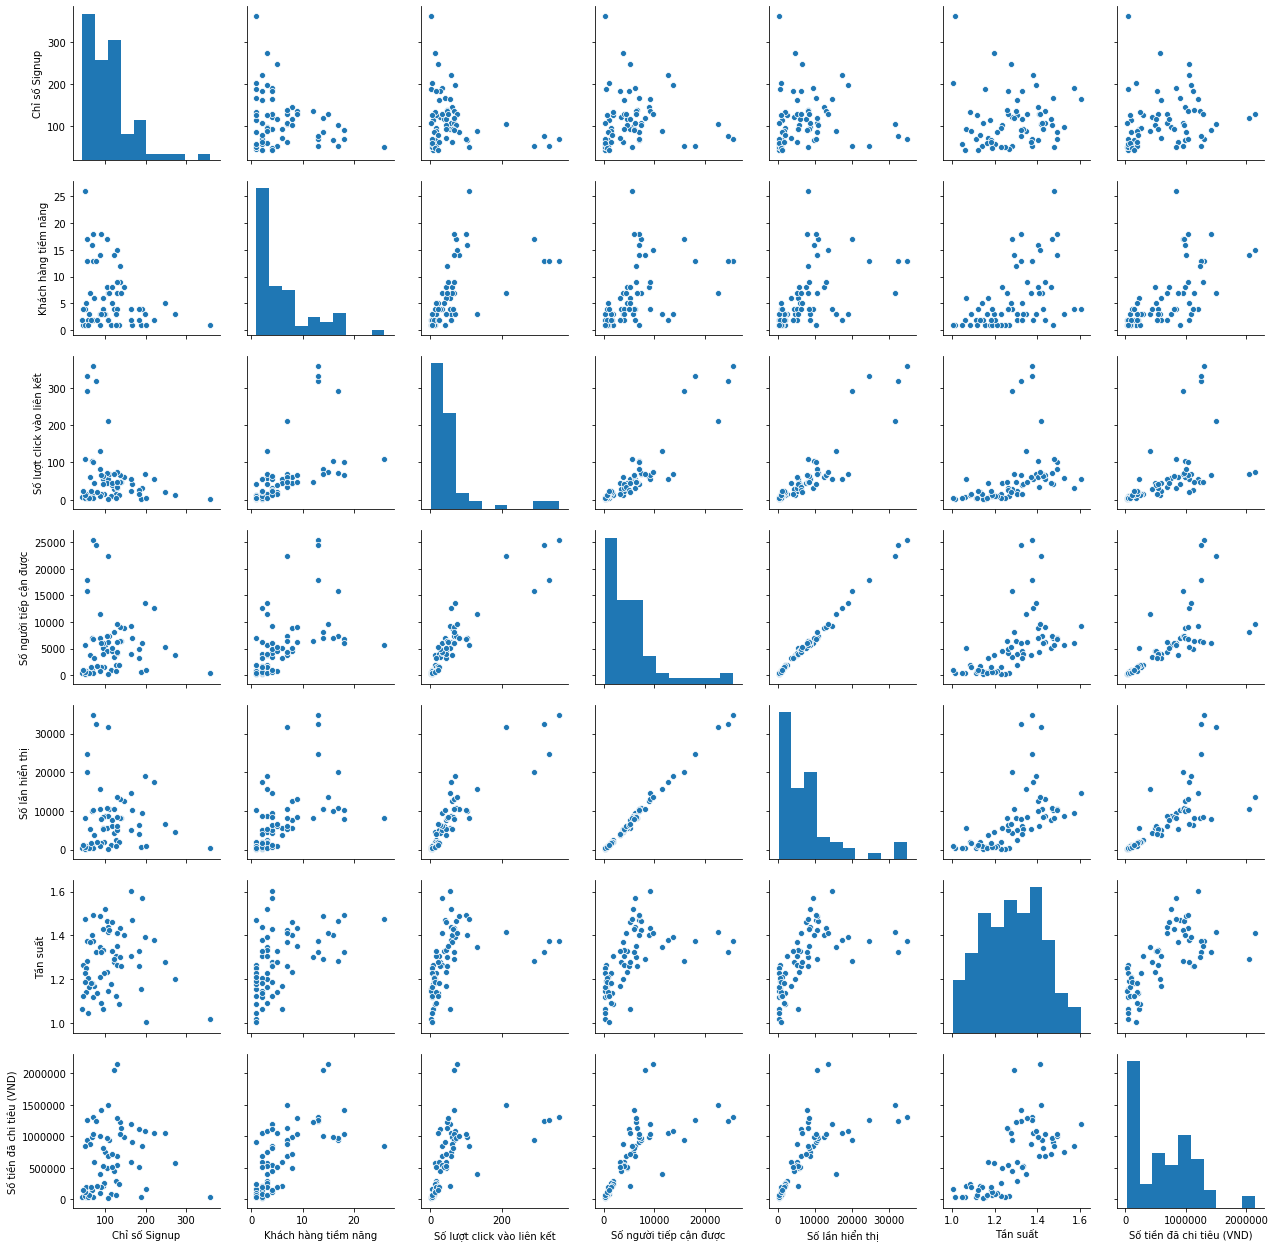

In [4]:
#------------ MATRIX HỆ SỐ TƯƠNG QUAN -------------------
seabornInstance.pairplot(dataset)

In [5]:
#------------ xác định chuỗi biến phụ thuộc -------------
X = dataset[['Số người tiếp cận được', 
             'Số lần hiển thị', 
             'Tần suất', 
#             'Số tiền đã chi tiêu (VND)', 
#             'Số lượt click vào liên kết', 
#             'Số lần hiển thị', 
#             'Chi phí tiếp cận 1.000 người', 
#             'Lượt tương tác với bài viết',
             'Số tiền đã chi tiêu (VND)']].values
y = dataset['Chỉ số Signup'].values

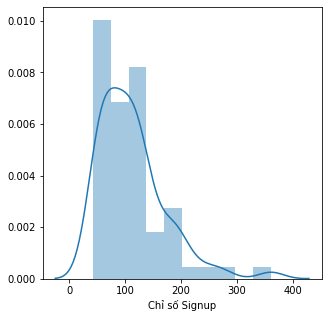

In [6]:
#----------- plot phân phối chuẩn biến độc lập----------
plt.figure(figsize=(5,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Chỉ số Signup'])

           0
0  -0.015296
1   0.009084
2 -95.779141
3   0.000065


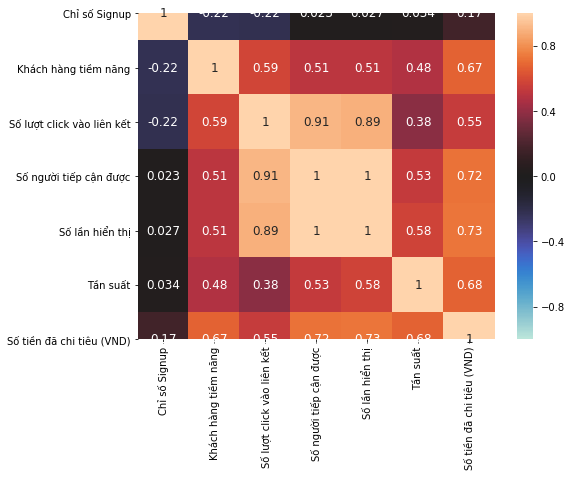

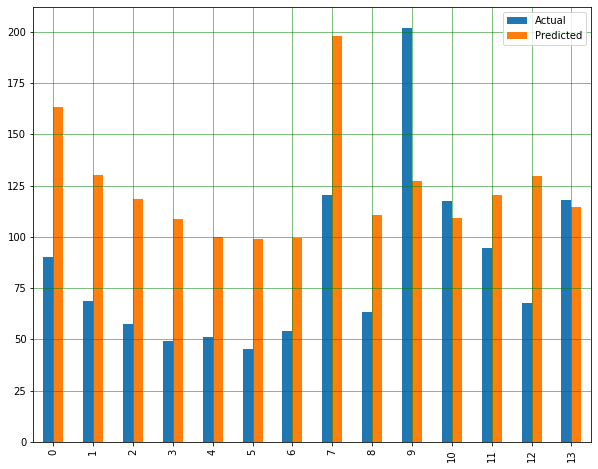

Mean Absolute Error: 50.092684541206424
Mean Squared Error: 3004.5850361791645
Root Mean Squared Error: 54.81409523269689
>>>>>> R Squared - Độ phù hợp của mô hình: -0.7619684404135452
>>>>>> (RMSE/MAE - 1)= 0.0942534969873019


In [7]:
#----------------- MATRIX CORR -------------------------
fig, ax = plt.subplots(figsize=(8,6)) 
seabornInstance.heatmap(dataset.corr(), annot=True,vmin=-1, vmax=1,center=0,
           annot_kws={'size': 12},ax=ax)

#Test 20% dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#thiếp lập mô hình
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#chỉ số tính toán từng biến của mô hình
coeff_df = pd.DataFrame(regressor.coef_)  
print(coeff_df)
#----------------------------------------------------------------------

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print('>>>>>> R Squared - Độ phù hợp của mô hình:',r2_score(y_test, y_pred))

a=float(((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/(metrics.mean_absolute_error(y_test, y_pred)))-1)
if a<=0.05:
    print('>>>>>> độ chính xác cao')
    if a<0.1 and a>0.05:
        print('>>>>>> độ chính xác tương đối')
else:
    print('>>>>>> (RMSE/MAE - 1)=',a)